# Лабораторная работа №4
## Исследование моделей размещения пользователей и распространения сигнала
### Логинов Сергей НФИмд-01-22

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

Зададим начальные значения

In [2]:
guard_size = 10
poisson_lam = 0.2 
radius = 0.5 
distance = 3

Фукнция для отрисовки круга

In [4]:
def plot_circle(x,y,r):
    angles=np.linspace(0,2*np.pi,50) 
    x_cir=x+r*np.cos(angles) 
    y_cir=y+r*np.sin(angles)
    plt.plot(x_cir,y_cir,'red')

Функция для определения количества блокираторов

In [5]:
def poisson_point_process(lambda0,area_size):
    N = np.random.poisson(lambda0*area_size**2)
    x = np.random.uniform(0,area_size,size=N)
    y = np.random.uniform(0,area_size,size=N)
    return x,y

Создаем блокираторы

In [6]:
x, y = poisson_point_process(poisson_lam,guard_size) 

Далее создаем транслятор и ресивер

In [7]:
x1 = np.random.uniform(0,guard_size)
y1 = np.random.uniform(0,guard_size)
angle = np.random.uniform(0,2*np.pi)
x2 = x1 + distance * np.cos(angle)
y2 = y1 + distance * np.sin(angle)

Рисуем график

[]

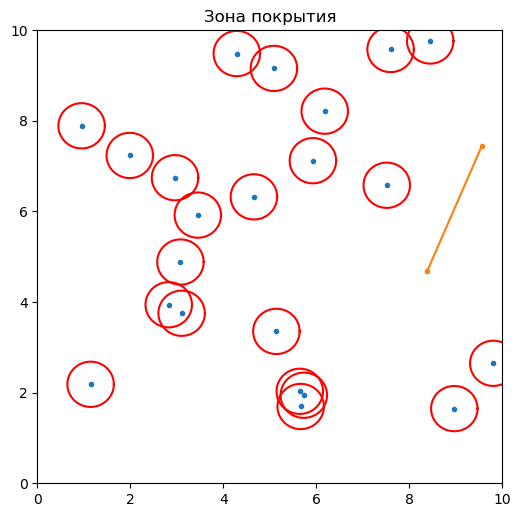

In [17]:
plt.figure(dpi=100, figsize=(6,6))
plt.title('Зона покрытия')
plt.plot(x,y,'.')
for i in range(len(x)): 
    plot_circle(x[i],y[i], radius)
plt.plot([x1,x2],[y1,y2], '.-')
plt.xlim(0,guard_size) 
plt.ylim(0,guard_size)
plt.plot()

Обрабатывем график, функция для проверки блокировки через пересечение прямой и окружности

In [9]:
def check_interection(line_d1, line_d2,c_xy,c_r):
    x1, y1 = line_d1
    x2, y2 = line_d2
    x0, y0 = c_xy   
    k = (y2-y1)/(x2-x1)
    b1 = y1 - x1*(y2-y1)/(x2-x1)
    a = k**2+1 
    b = -2*x0+2*k*(b1-y0)
    c = x0**2+(b1-y0)**2-c_r**2
    d = b**2-4*a*c
    if d>=0:
        block = True
    else:
        block = False
    return block

Моделирование

In [11]:
num_experiments = 1000
summa = 0
for i in range (num_experiments): 
    dots_x, dots_y=poisson_point_process(poisson_lam, guard_size)
    x1 = np.random.uniform(0,guard_size)
    y1 = np.random.uniform(0,guard_size)
    angle = np.random.uniform(0,2*np.pi)
    x2 = x1 + distance * np.cos(angle)
    y2 = y1 + distance * np.sin(angle)
    for j in range(len(dots_y)): 
        blocked = check_interection([x1,y1], [x2,y2],[dots_x[j],dots_y[j]],radius)
        if blocked == True:
            summa+=1 
            break

Проверяем результаты

In [15]:
print('Экспериментальная вероятность блокировки = ', summa/num_experiments)
s_zone = 2*guard_size/2*distance
lam = poisson_lam*s_zone
p=1-math.exp(-lam)
print('Аналитическая вероятность блокировки = ',p)

Экспериментальная вероятность блокировки =  0.847
Аналитическая вероятность блокировки =  0.9975212478233336
